$$
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qfor{\qquad\hbox{for}\qquad}
\def\qwhere{\qquad\hbox{where}\qquad}
\def\ale#1{\begin{align}#1\end{align}}
\def\em{\epsilon_m}
\def\unit#1{{\rm #1}}
\def\com#1{\color{blue}{\textrm{#1}}} 
$$
# Lab 3: Dynamical Systems

- Two weeks. __Due:__ 1pm Wednesday 25th March.

- Submit your lab by dropping this notebook with your answers into `dropbox` on `pleiades`. 

- __Rename your notebook to__ `Lab3_yourLoginName.ipynb` before submitting it by dragging it onto the dropbox folder. You can confirm submission (and resubmit up to the deadline), by repreating the process. If you are asked whether to replace the file, this confirms it has been successfully submitted to the dropbox. __Please confirm your submission__.

$\com{Please leave this command for marker's comments}$

---

In [2]:
# Imports
import Pkg;
Pkg.add("Plots");
Pkg.add("LaTeXStrings");
Pkg.add("DifferentialEquations");

using Plots;
using LaTeXStrings;
using DifferentialEquations;

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %]  34.4 % [================>                        ]  37.7 %64.1 %Fetching: [============================>            ]  69.6 %Fetching: [=====================================>   ]  91.4 % Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]


# A. Steady states
1.   
   Solving the pair of coupled ordinary differential equations for our laser model, we get the following solutions: when $n = 0$, $N = \frac{p}{\lambda}$ and when $n = \frac{p}{\kappa} - \frac{\lambda}{\gamma}$, $N = \frac{\kappa}{\gamma}$
   
   The laser starts lasing when $n \geq 0$, hence, the lasing threshold, $p_c$, is:
   
   $
   \begin{align}
   n &= 0\\
   \frac{p_c}{\kappa} &= \frac{\lambda}{\gamma}\\
   p_c &= \frac{\lambda}{\gamma} \kappa\\
   \end{align}$
   
   The steady state solutions above the lasing threshold in terms of $p_c$ is: when $n = \frac{p - p_c}{\kappa}$, $N = \frac{\kappa}{\gamma}$.

2.   
        The plot of $\bar{n}(p)$ against $p$ shows that the laser only starts lasing when the pump rate is greater than or equal to the lasing threshold $p_c$. The plot was generated using the code below.

        ```julia
    # Define constants
    λ = 0.03; # Decay rate due to spontaneous emission
    κ = 0.01; # Decay rate due to loss of photons
    γ = 1e-4; # Gain rate for stimulated emission
    p_c = (λ * κ) / γ; # Lasing threshold

    n(p) = p >= p_c ? (p - p_c) / κ : 0; # Steady state solution for n
    N(p) = p >= p_c ? κ / γ : p / λ; # Steady state solution for N

    pumpConstants = collect(0:0.1:3); # Pump constant values, Interval: (0, 3)
    plot(n, [pumpConstants * p_c for pumpConstants in pumpConstants], 
            label = L"\mathrm{\bar{n}}(p) = \kappa^{-1} (p - p_c)")
    plot!(N, [pumpConstants * p_c for pumpConstants in pumpConstants], 
            label = L"\mathrm{\bar{N}}(p) = \kappa^{-1} (p - p_c)") 

    # Plot attributes
    title!("Graph for A.2")
    xlabel!(L"\textrm{Pump constant, }p")
    ylabel!(L"\textrm{Population}")      
        ```

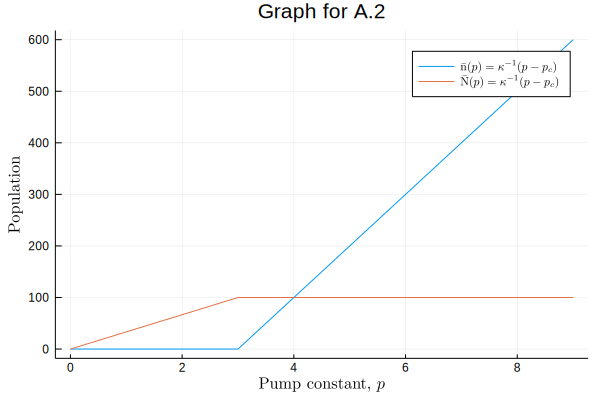

In [2]:
# Code for A.2
# Define constants
λ = 0.03; # Decay rate due to spontaneous emission
κ = 0.01; # Decay rate due to loss of photons
γ = 1e-4; # Gain rate for stimulated emission
p_c = (λ * κ) / γ; # Lasing threshold

n(p) = p >= p_c ? (p - p_c) / κ : 0; # Steady state solution for n
N(p) = p >= p_c ? κ / γ : p / λ; # Steady state solution for N

pumpConstants = collect(0:0.1:3); # Pump constant values, Interval: (0, 3)
plot(n, [pumpConstants * p_c for pumpConstants in pumpConstants], 
        label = L"\mathrm{\bar{n}}(p) = \kappa^{-1} (p - p_c)")
plot!(N, [pumpConstants * p_c for pumpConstants in pumpConstants], 
        label = L"\mathrm{\bar{N}}(p) = \kappa^{-1} (p - p_c)") 

# Plot attributes
title!("Graph for A.2")
xlabel!(L"\textrm{Pump constant, }p")
ylabel!(L"\textrm{Population}")

3. As the populations ($n$ and $N$) are dimensionless, a reformulation is unnecessary for this problem.

# B. Below threshold (region I)
1.   
        The laser model is described by (note: $\dot n$ and $\dot N$ are derivatives with respect to time):
        
        $\begin{align}
            \dot n &= \gamma n N - \kappa n\\
            \dot N &= -\gamma n N - \lambda N + p
        \end{align}$
        
        The steady state solutions below threshold are:
        
        $\begin{align}
            \bar{n} &= 0\\
            \bar{N} &= \frac{p}{\lambda}
        \end{align}$
        
        Linearizing around the steady states below threshold (note: $\epsilon(t) = \delta_n(t)$, $\delta(t) = \delta_N(t)$ and that $\dot \epsilon$ and $\dot \delta$ are derivatives with respect to time)
        
        $\begin{align}
            \dot \epsilon &= \gamma (\bar{n} + \epsilon(t))(\bar{N} + \delta(t)) - \kappa(\bar{n} + \epsilon (t))\\
            \dot \delta &= -\gamma (\bar{n} + \epsilon(t))(\bar{N} + \delta(t)) - \lambda(\bar{N} + \delta(t)) + p
            \end{align}$
        
        Plugging in the steady state solutions below threshold, we find an expression for the linearized equations of motion around the steady state below threshold:
        
        $\begin{align}
            \dot \epsilon &= \frac{\epsilon \kappa}{p_c}(p-p_c)\\
            \dot \delta &= -\gamma \epsilon \bar{N} - \lambda \delta
        \end{align}$
        
        The linearized equations above show that if $\epsilon(t) > 0$, $n$ will return to the steady state as $\dot \epsilon$, as the rate of change of $\epsilon(t)$ is negative.  Similarly, if $\delta(t) > 0$, $N$ will also return to the steady state as the rate of change of $\delta(t)$, $\dot \delta$ is negative. Hence, based on our analysis we can conclude that the steady states are attractors as the system moves towards them if it starts away from them.

2.   
        To ensure that the conclusions we drew from our analysis is correct, the equations of motion were solved numerically with $p = 0.99 p_c$ and the initial conditions: $n(0) = 200$, $N(0) = 400$. Plotting the results, we find that the steady states are indeed attractors, splendid! The code below was used to solve the equations of motion numerically and plot the result.
        ```julia
    # Constants
    p = [0.03, 0.01, 1e-4]; # Parameters (λ, κ, γ)
    p_c = (p[1] * p[2]) / p[3] # Lasing threshold (λκ/γ)
    t = [0, 1e5] # Initial time, Final time
    u0 = [200.0, 400.0]; # Inital values, n(0) and N(0)
    tspan = (t[1], t[2]); # Timespan
    t = LinRange(t[1], t[2], 1000) # Number of points

    n(p) = p >= p_c ? (p - p_c) / p[2] : 0; # n as a function of p/p_c

    # Lasing model
    function lasing!(du, u, p, t)
        n, N = u
        λ, κ, γ = p
        p_c = (λ * κ) / γ
        du[1] = dn = γ*n*N - κ*n
        du[2] = dN = -γ*n*N - λ*N + 0.99 * p_c
    end

    # Solve the differential equations
    prob = ODEProblem(lasing!, u0, tspan, p);
    sol = solve(prob, saveat=t); # Solutions

    # Plot the graph
    plot(t, sol[1, :], c=:blue, 
        label = L"\mathrm{n(0) = 200}") # Linearized e.o.m
    plot!(t, fill(n(0.99*p_c), 1000), c=:blue, lw=6, alpha=0.3, 
        label = L"\mathrm{\bar{n}(t)}") # Steady state
    plot!(t, sol[2, :], c=:red, 
        label = L"\mathrm{N(0) = 400}") # Linearized e.o.m
    plot!(t, fill(p[2]/p[3], 1000), c=:red, lw=6, alpha=0.3, 
        label = L"\mathrm{\bar{N}(t)}") # Steady state

    # Plot attributes
    title!("Graph for B.2")
    xlabel!(L"\textrm{Time, } t \ (\textrm{s})")
    ylabel!(L"\textrm{Population}")
        ```

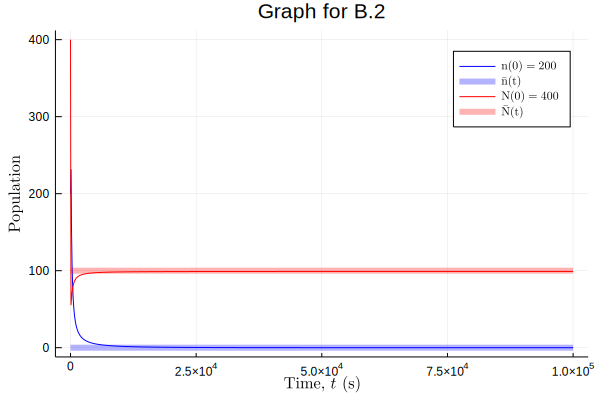

In [5]:
# Code for B.2
# Constants
p = [0.03, 0.01, 1e-4]; # Parameters (λ, κ, γ)
p_c = (p[1] * p[2]) / p[3] # Lasing threshold (λκ/γ)
t = [0, 1e5] # Initial time, Final time
u0 = [200.0, 400.0]; # Inital values, n(0) and N(0)
tspan = (t[1], t[2]); # Timespan
t = LinRange(t[1], t[2], 1000) # Number of points

n(p) = p >= p_c ? (p - p_c) / p[2] : 0; # n as a function of p/p_c

# Lasing model
function lasing!(du, u, p, t)
    n, N = u
    λ, κ, γ = p
    p_c = (λ * κ) / γ
    du[1] = dn = γ*n*N - κ*n
    du[2] = dN = -γ*n*N - λ*N + 0.99 * p_c
end

# Solve the differential equations
prob = ODEProblem(lasing!, u0, tspan, p);
sol = solve(prob, saveat=t); # Solutions

# Plot the graph
plot(t, sol[1, :], c=:blue, 
    label = L"\mathrm{n(0) = 200}") # Linearized e.o.m
plot!(t, fill(n(0.99*p_c), 1000), c=:blue, lw=6, alpha=0.3, 
    label = L"\mathrm{\bar{n}(t)}") # Steady state
plot!(t, sol[2, :], c=:red, 
    label = L"\mathrm{N(0) = 400}") # Linearized e.o.m
plot!(t, fill(p[2]/p[3], 1000), c=:red, lw=6, alpha=0.3, 
    label = L"\mathrm{\bar{N}(t)}") # Steady state

# Plot attributes
title!("Graph for B.2")
xlabel!(L"\textrm{Time, } t \ (\textrm{s})")
ylabel!(L"\textrm{Population}")

# C. Above threshold (region II)
1.   
        The equations of motion were numerically solved with $p = 1.1 p_c$ and initial values $n(0) = 0$, $n(0) = 1e^{-2}$ and $N(0) = \bar{N}(p)$. We find that $N(t)$ and $n(t)$ (when $n(0) = 1e^{-2}$) move towards the steady state above threshold as we expected based upon our results in Part B.2. Additionally, when $n(0) = 0$ we find $n(t)$ moves towards the steady state below threshold, adding further evidence to confirm our findings from part B, namely that the steady states are attractors. The code below was used to solve the equations of motion numerically and plot the results.
        ```julia
    # Constants
    p = [0.03, 0.01, 1e-4]; # Parameters (λ, κ, γ)
    p_c = (p[1] * p[2]) / p[3] # Lasing threshold
    t = [0, 1e5] # Initial time, Final time
    u0_1 = [1e-2, p[2] / p[3]]; # Inital values, n(0)=1e-2 and N(0) = κ/γ
    u0_2 = [0, 1.1 * p_c]; # Initial values, n(0)=0 and N(0) = κ/γ
    tspan = (t[1], t[2]); # Timespan
    t = LinRange(t[1], t[2], 1000) # Number of points

    # Steady state solutions
    n(p) = p >= p_c ? (p - p_c) / p[2] : 0; # n as a function of p/p_c

    # Lasing model
    function lasing!(du, u, p, t)
        n, N = u
        λ, κ, γ = p
        p_c = (λ * κ) / γ
        du[1] = dn = γ*n*N - κ*n
        du[2] = dN = -γ*n*N - λ*N + 1.1 * p_c
    end

    # Solve the differential equations
    prob_1 = ODEProblem(lasing!, u0_1, tspan, p);
    sol_1 = solve(prob_1, saveat=t); # Solutions
    prob_2 = ODEProblem(lasing!, u0_2, tspan, p);
    sol_2 = solve(prob_2, saveat=t);

    # Plot the graph
    plot(t, sol_1[1, :], label = L"\mathrm{n(0) = 1e^{-2}}")
    plot!(t, sol_2[1, :], label = L"\mathrm{n(0) = 0}")
    plot!(t, sol_1[2, :], label = L"\mathrm{N(0) = \kappa \gamma^{-1}}")

    # Plot attributes
    title!("Graph for C.1")
    xlabel!(L"\textrm{Time, } t \ (\textrm{s})")
    ylabel!(L"\textrm{Population}")
        ```

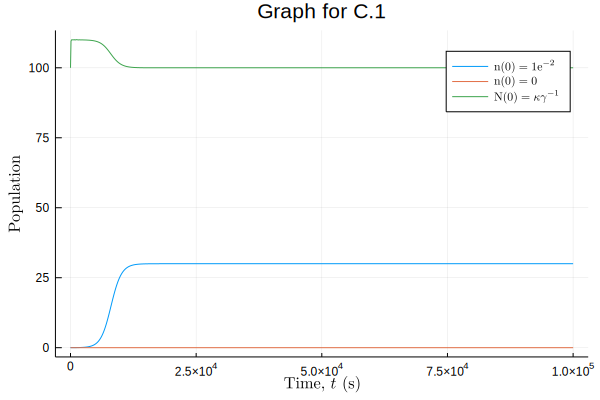

In [4]:
# Code for C.1
# Constants
p = [0.03, 0.01, 1e-4]; # Parameters (λ, κ, γ)
p_c = (p[1] * p[2]) / p[3] # Lasing threshold
t = [0, 1e5] # Initial time, Final time
u0_1 = [1e-2, p[2] / p[3]]; # Inital values, n(0)=1e-2 and N(0) = κ/γ
u0_2 = [0, 1.1 * p_c]; # Initial values, n(0)=0 and N(0) = κ/γ
tspan = (t[1], t[2]); # Timespan
t = LinRange(t[1], t[2], 1000) # Number of points

# Steady state solutions
n(p) = p >= p_c ? (p - p_c) / p[2] : 0; # n as a function of p/p_c

# Lasing model
function lasing!(du, u, p, t)
    n, N = u
    λ, κ, γ = p
    p_c = (λ * κ) / γ
    du[1] = dn = γ*n*N - κ*n
    du[2] = dN = -γ*n*N - λ*N + 1.1 * p_c
end

# Solve the differential equations
prob_1 = ODEProblem(lasing!, u0_1, tspan, p);
sol_1 = solve(prob_1, saveat=t); # Solutions
prob_2 = ODEProblem(lasing!, u0_2, tspan, p);
sol_2 = solve(prob_2, saveat=t);

# Plot the graph
plot(t, sol_1[1, :], label = L"\mathrm{n(0) = 1e^{-2}}")
plot!(t, sol_2[1, :], label = L"\mathrm{n(0) = 0}")
plot!(t, sol_1[2, :], label = L"\mathrm{N(0) = \kappa \gamma^{-1}}")

# Plot attributes
title!("Graph for C.1")
xlabel!(L"\textrm{Time, } t \ (\textrm{s})")
ylabel!(L"\textrm{Population}")

2.   
        The steady state solutions above threshold are: $\bar{n} = \frac{p-p_c}{\kappa}$ and $\bar{N} = \frac{\kappa}{\gamma}$
        
        Linearizing around the steady states we get:
        
        $\begin{align}
        \dot \epsilon &= \gamma (\bar{n} + \epsilon)(\bar{N} + \delta) - \kappa(\bar{n} + \epsilon)\\
                      &= (p-p_c) + \gamma \bar{n} \epsilon + \kappa \epsilon - \kappa \epsilon - (p-p_c)\\
                      &= \gamma \bar{n} \delta
        \end{align}$
        
        $\begin{align}
        \dot \delta &= -\gamma (\bar{n} + \epsilon)(\bar{N} + \delta) - \lambda(\bar{N} + \delta) + p\\
                    &= -(p-p_c) - \gamma \bar{n} \delta - \kappa \epsilon - \lambda \bar{N} - \lambda \delta + p\\
                    &= -\dot \epsilon - \kappa \epsilon - \frac{\lambda}{\gamma \bar{n}} \dot \epsilon
         \end{align}$
        
        So, the linearized equations of motion above threshold are: $\dot \epsilon = \gamma \bar{n} \delta$ and $\dot \delta = -\dot \epsilon - \kappa \epsilon - \frac{\lambda}{\gamma \bar{n}} \dot \epsilon$

3.   
        The linearized equations of motion we found above are coupled. To decouple them, we simply need to find the derivative with respect to time again. So:
        
        Taking the time derivative of $\dot \delta$, $\ddot \delta$, and substituting $\ddot \epsilon = \gamma \bar{n} \dot \delta$ and $\dot \epsilon = \gamma \bar{n} \delta$, we find that:
        
        $\begin{align}
        \ddot \delta &= - \ddot \epsilon - \kappa \dot \epsilon - \frac{\lambda}{\gamma \bar{n}} \ddot \epsilon\\
                         &= - \gamma \bar{n} \dot \delta - \kappa \gamma \bar{n} \delta - \lambda \dot \delta\\
                         &= - \kappa \gamma \bar{n} \delta - \dot \delta (\gamma \bar{n} + \lambda)
        \end{align}$
        
        Similarly, for $\ddot \epsilon$, we substitute $\dot \delta = - \dot \epsilon - \kappa \epsilon - \frac{\lambda}{\gamma \bar{n}} \dot \epsilon$
        
        $\begin{align}
        \ddot \epsilon &= \gamma \bar{n} \left( -\dot \epsilon - \kappa \epsilon - \frac{\lambda}{\gamma \bar{n}} \dot \epsilon \right)\\
                       &= -\gamma \bar{n} \dot \epsilon - \gamma \bar{n} \kappa \epsilon - \lambda \dot \epsilon\\
                       &= - \kappa \gamma \bar{n} \epsilon - \dot \epsilon (\gamma \bar{n} + \lambda)
        \end{align}$
        
        From the linearized decoupled equations of motion above threshold above, we see that:
        
        The characteristic frequency of oscillation, $\omega = \sqrt{\kappa \gamma \bar{n}} = \sqrt{\gamma (p - p_c)}$
        
        The damping rate, $2 \beta = \frac{1}{2} (\gamma \bar{n} + \lambda) = \frac{1}{2}\left(\frac{\lambda p}{p_c}\right)$
        
        Interpreting our results, it is clear that the characteristic frequency of oscillation and the damping rate are proportional to the pump constant, $p$.

4.   
        Rearranging our results, we find that:
        
        $\begin{align}
        \ddot \delta + \dot \delta (\gamma \bar{n} + \lambda + \kappa \gamma \bar{n} \delta ) &= 0\\
        \ddot \epsilon + \dot \epsilon (\gamma \bar{n} + \lambda) + \kappa \gamma \bar{n} \epsilon &= 0
        \end{align}$
        
        Comparing the equations above with the equations of motion for a system undergoing damped simple harmonic motion, $\ddot x + 2\beta \dot x + \omega_0^{2} x = 0$, we find that:
        
        $\begin{align}
        \frac{\beta}{\omega_0} &= \frac{1}{2} \left( \frac{\lambda p}{p_c} \frac{1}{\sqrt{\gamma(p-p_c)}} \right)\\
                         &= \frac{1}{2 \sqrt{\gamma}} \frac{p}{\kappa \sqrt{p-p_c}}
        \end{align}$
        
        A system undergoing damped simple harmonic motion is underdamped if $\frac{\beta}{\omega_0} < 1$, based on the expression we found above and the parameters introduced in part A, $\frac{\beta}{\omega_0} > 1$, so, our system is overdamped and it won't reach an underdamped regime.
        
        The linearized equations of motion have solutions of the form:
        
        $\begin{align}
        \epsilon (t) &= C_1 \mathrm{e}^{-(\beta - \sqrt{\beta^{2} - \omega_0^{2}})t} + C_2 \mathrm{e}^{-(\beta + \sqrt{\beta^{2} - \omega_0^{2}})t}\\
        \delta(t) &= C_3 \mathrm{e}^{-(\beta - \sqrt{\beta^{2} - \omega_0^{2}})t} + C_4 \mathrm{e}^{-(\beta + \sqrt{\beta^{2} - \omega_0^{2}})t}
        \end{align}$
        
        The constants $C_1$, $C_2$, $C_3$, and $C_4$ are determined by initial values of $\epsilon(t)$ and $\delta(t)$. Thus,
        
        $\begin{align}
        \epsilon (t) &= \epsilon_0 \mathrm{e}^{-(\beta - \sqrt{\beta^{2} - \omega_0^{2}})t} + \epsilon_0 \mathrm{e}^{-(\beta + \sqrt{\beta^{2} - \omega_0^{2}})t}\\
        \delta(t) &= \delta_0 \mathrm{e}^{-(\beta - \sqrt{\beta^{2} - \omega_0^{2}})t} + \delta_0 \mathrm{e}^{-(\beta + \sqrt{\beta^{2} - \omega_0^{2}})t}
        \end{align}$
        
        where $\epsilon_0$ and $\delta_0$ are the initial values of $\epsilon(t)$ and $\delta(t)$